### **LAB 2**

### **AIM:** Perform statistical data analysis such as: Estimators of the main statistical measures (mean, variance, standard deviation, covariance correlation, standard error

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns


In [122]:
df = pd.read_csv('/content/sample_data/Video_Games_Sales_as_at_22_Dec_2016.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
column = list(df.columns)
column

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating']

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [125]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


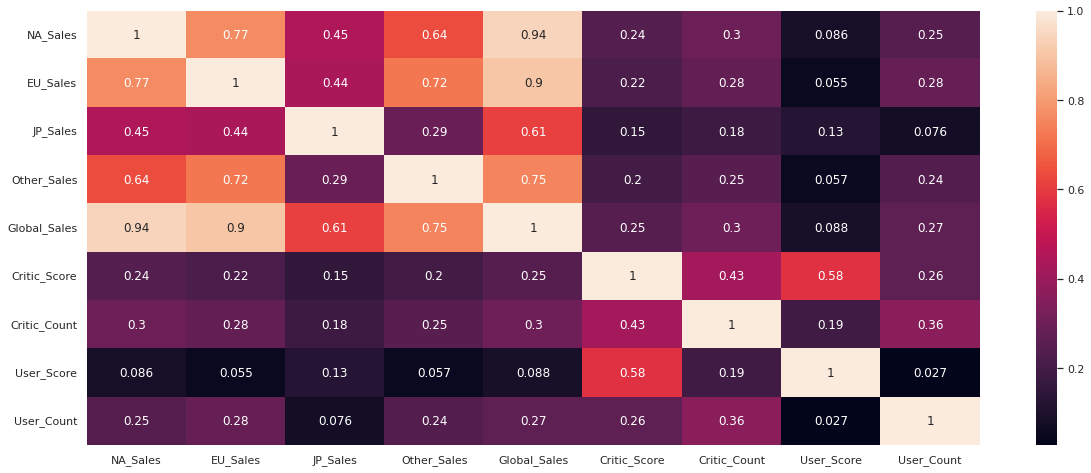

In [126]:
sns.set(rc={'figure.figsize':(20,8)})
sns.heatmap(df[column[5:14]].corr(), annot=True)

In [127]:
sns.set(rc={'figure.figsize':(10,5)})

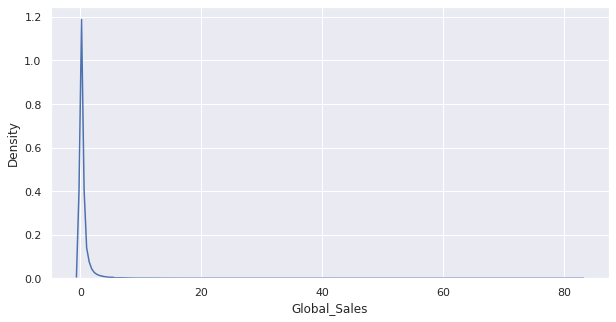

In [128]:
sns.kdeplot(x=df['Global_Sales'])

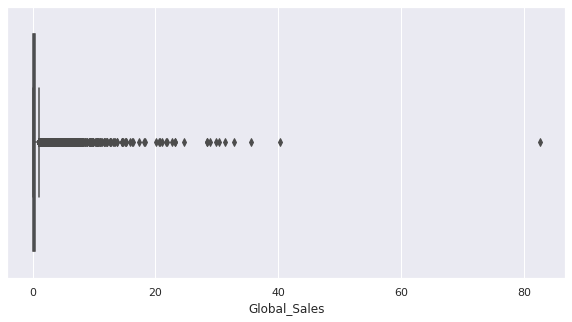

In [129]:
sns.boxplot(x=df['Global_Sales'])

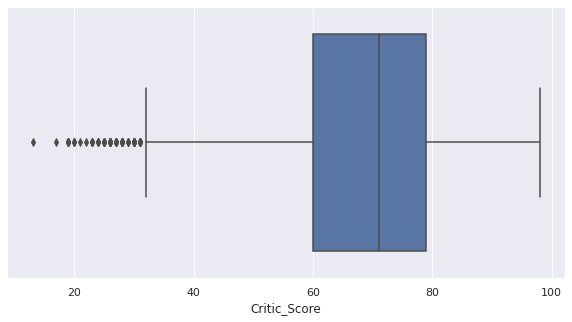

In [130]:
sns.boxplot(x=df['Critic_Score'])

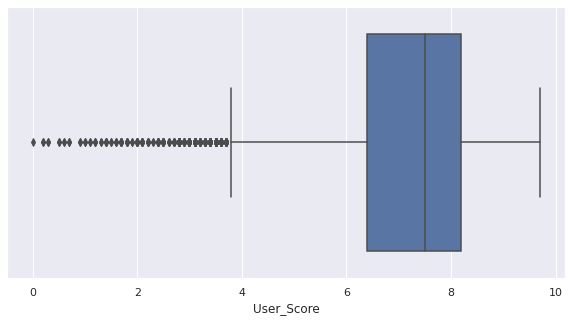

In [131]:
sns.boxplot(x=df['User_Score'])

In [132]:
cols = column[5:14]

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df_out_rem = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out_rem

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2323,Castlevania: Circle of the Moon,GBA,2001.0,Platform,Konami Digital Entertainment,0.60,0.22,0.05,0.02,0.89,91.0,22.0,8.5,59.0,KCEK,T
2413,Ghostbusters: The Video Game,Wii,2009.0,Action,Atari,0.59,0.20,0.00,0.07,0.86,76.0,29.0,8.5,28.0,Red Fly Studio,E10+
2426,Pictionary,Wii,2010.0,Puzzle,THQ,0.60,0.19,0.00,0.07,0.85,71.0,7.0,NaN,NaN,Page 44 Studios,E
2471,Metroid: Zero Mission,GBA,2004.0,Adventure,Nintendo,0.60,0.22,0.00,0.01,0.84,89.0,50.0,9.0,132.0,Nintendo,E
2482,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,57.0,6.0,5.0,5.0,Artificial Mind and Movement,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df_out_rem.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,11080.000000,11276.000000,11276.000000,11276.000000,11276.000000,11276.000000,5051.000000,5051.000000,4412.000000,4412.000000
mean,2006.872202,0.097970,0.036965,0.010868,0.011328,0.157566,65.900020,20.590378,7.181097,27.719855
std,5.299318,0.117797,0.054051,0.022641,0.015670,0.158660,12.282988,13.767558,1.234576,33.235370
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,32.000000,3.000000,3.800000,4.000000
25%,2004.000000,0.000000,0.000000,0.000000,0.000000,0.040000,58.000000,10.000000,6.400000,8.000000
50%,2008.000000,0.060000,0.010000,0.000000,0.010000,0.100000,67.000000,17.000000,7.400000,15.000000
75%,2010.000000,0.140000,0.050000,0.010000,0.020000,0.220000,75.000000,28.000000,8.100000,32.000000
max,2020.000000,0.600000,0.270000,0.100000,0.070000,0.890000,94.000000,72.000000,9.700000,186.000000


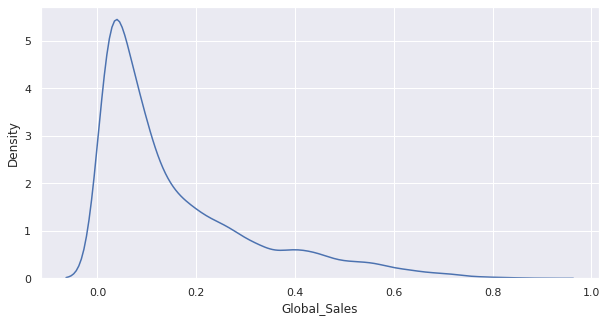

In [134]:
sns.kdeplot(x=df_out_rem['Global_Sales'])

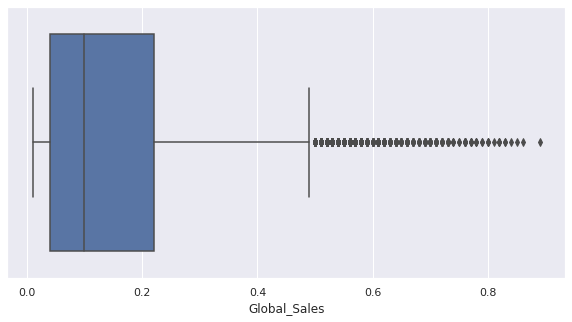

In [135]:
sns.boxplot(x=df_out_rem['Global_Sales'])

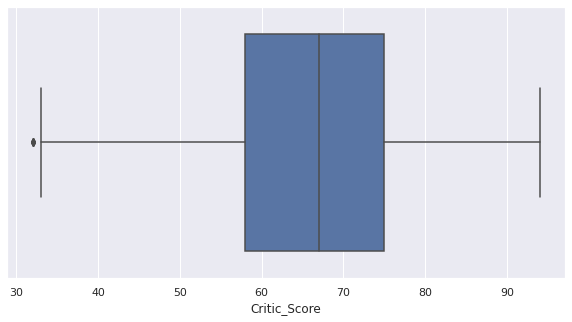

In [136]:
sns.boxplot(x=df_out_rem['Critic_Score'])

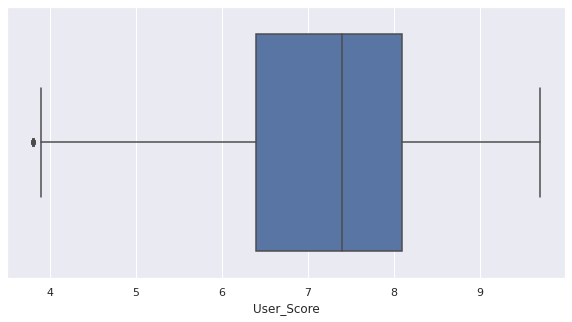

In [137]:
sns.boxplot(x=df_out_rem['User_Score'])

In [138]:
column

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating']

In [139]:
for g in df_out_rem['Platform'].unique().tolist():
  print(g.ljust(15) + " : " + str(df_out_rem[df_out_rem['Platform']==g].shape[0]))

GBA             : 673
Wii             : 984
X360            : 843
DS              : 1722
XB              : 705
GC              : 467
N64             : 221
XOne            : 166
PS              : 724
PSP             : 866
WiiU            : 96
PC              : 531
2600            : 90
PS3             : 711
3DS             : 345
PS2             : 1380
PSV             : 355
PS4             : 221
NES             : 3
SNES            : 49
DC              : 22
SAT             : 69
NG              : 6
GEN             : 11
SCD             : 4
GB              : 5
3DO             : 3
GG              : 1
WS              : 1
PCFX            : 1
TG16            : 1


In [140]:
plt_data = df_out_rem[['Platform','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']]
plt_data.sort_values('Global_Sales', ascending=False)

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2323,GBA,0.60,0.22,0.05,0.02,0.89
2413,Wii,0.59,0.20,0.00,0.07,0.86
2426,Wii,0.60,0.19,0.00,0.07,0.85
2471,GBA,0.60,0.22,0.00,0.01,0.84
2482,GBA,0.60,0.22,0.00,0.01,0.83
...,...,...,...,...,...,...
16294,PS2,0.00,0.00,0.01,0.00,0.01
16295,GBA,0.01,0.00,0.00,0.00,0.01
16296,X360,0.00,0.00,0.01,0.00,0.01
16297,X360,0.01,0.00,0.00,0.00,0.01


In [141]:
sns.set(rc={'figure.figsize':(10,5)})

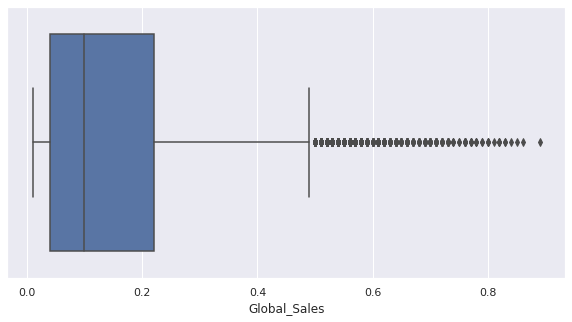

In [142]:
sns.boxplot(x=plt_data['Global_Sales'])

In [143]:
tot_sum = plt_data.groupby('Platform').sum().sort_values('Global_Sales', ascending=False)


In [144]:
tot_sum.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,35.635806,13.445806,3.953226,4.120323,57.313226
std,48.510493,19.240783,5.756151,6.867812,74.564770
min,0.000000,0.000000,0.000000,0.000000,0.020000
25%,0.000000,0.000000,0.070000,0.000000,0.415000
50%,8.120000,5.660000,1.230000,1.430000,25.370000
75%,61.525000,22.530000,4.730000,3.870000,100.365000
max,158.470000,80.450000,20.360000,29.470000,243.780000


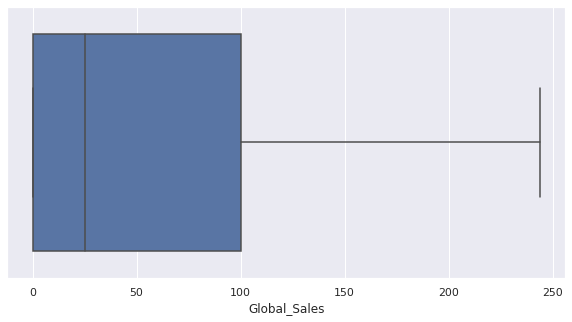

In [145]:
sns.boxplot(x=tot_sum['Global_Sales'])

In [146]:
print(np.mean(tot_sum['Global_Sales']))
# tot_sum[tot_sum['Global_Sales']>= np.mean(tot_sum['Global_Sales'])]
tot_sum.sort_values('Global_Sales',ascending=False)

57.31322580645161


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,119.27,80.45,14.51,29.47,243.78
DS,158.47,28.30,20.36,15.30,223.20
Wii,138.64,29.67,5.79,14.24,188.93
X360,122.75,43.30,4.38,15.54,186.18
PS,77.97,52.93,5.08,9.46,145.44
XB,97.95,29.10,0.56,4.28,132.45
GBA,88.18,32.64,2.49,1.64,125.70
PS3,59.02,31.03,11.50,14.38,115.96
GC,64.03,16.76,1.59,1.88,84.77


In [147]:
print(np.median(tot_sum['Global_Sales']))
# tot_sum[tot_sum['Global_Sales']>= np.median(tot_sum['Global_Sales'])]

25.37


Maximum sales for each platform

In [148]:
plt_data.groupby('Platform').max().sort_values('Global_Sales', ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
GBA,0.60,0.22,0.10,0.03,0.89
Wii,0.60,0.27,0.10,0.07,0.86
X360,0.58,0.27,0.08,0.07,0.83
XB,0.59,0.24,0.08,0.03,0.82
DS,0.60,0.27,0.10,0.07,0.82
GC,0.60,0.20,0.10,0.03,0.78
N64,0.60,0.22,0.10,0.07,0.77
XOne,0.46,0.27,0.02,0.07,0.76
PS,0.40,0.27,0.10,0.05,0.72


Minimum sales for each platform

In [149]:
plt_data.groupby('Platform').min().sort_values('Global_Sales', ascending=True)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS,0.00,0.0,0.00,0.0,0.01
X360,0.00,0.0,0.00,0.0,0.01
WiiU,0.00,0.0,0.00,0.0,0.01
Wii,0.00,0.0,0.00,0.0,0.01
SNES,0.00,0.0,0.01,0.0,0.01
PSV,0.00,0.0,0.00,0.0,0.01
PSP,0.00,0.0,0.00,0.0,0.01
PS4,0.00,0.0,0.00,0.0,0.01
PS3,0.00,0.0,0.00,0.0,0.01


Mean sales for each platform

In [150]:
plt_data.groupby('Platform').mean().sort_values('Global_Sales', ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
2600,0.333667,0.019889,0.000000,0.002222,0.357111
N64,0.190860,0.041448,0.005566,0.003213,0.242217
X360,0.145611,0.051364,0.005196,0.018434,0.220854
PS,0.107693,0.073108,0.007017,0.013066,0.200884
Wii,0.140894,0.030152,0.005884,0.014472,0.192002
XB,0.138936,0.041277,0.000794,0.006071,0.187872
GBA,0.131025,0.048499,0.003700,0.002437,0.186776
WiiU,0.095313,0.065833,0.008542,0.014896,0.184688
GC,0.137109,0.035889,0.003405,0.004026,0.181520


### Year of Release Analysis

In [151]:
yr_rel_data = df_out_rem[['Year_of_Release','Platform','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']].sort_values('Year_of_Release')
yr_rel_data

,Year_of_Release,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5360,1980.0,2600,0.32,0.02,0.0,0.00,0.34
6301,1980.0,2600,0.25,0.02,0.0,0.00,0.27
4019,1980.0,2600,0.46,0.03,0.0,0.01,0.49
6876,1980.0,2600,0.22,0.01,0.0,0.00,0.24
3394,1981.0,2600,0.55,0.03,0.0,0.01,0.59
...,...,...,...,...,...,...,...
16376,NaN,PSP,0.01,0.00,0.0,0.00,0.01
16409,NaN,GC,0.01,0.00,0.0,0.00,0.01
16452,NaN,PC,0.01,0.00,0.0,0.00,0.01
16462,NaN,PS3,0.01,0.00,0.0,0.00,0.01


In [152]:
yr_rel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11276 entries, 5360 to 16526
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  11080 non-null  float64
 1   Platform         11276 non-null  object 
 2   NA_Sales         11276 non-null  float64
 3   EU_Sales         11276 non-null  float64
 4   JP_Sales         11276 non-null  float64
 5   Other_Sales      11276 non-null  float64
 6   Global_Sales     11276 non-null  float64
dtypes: float64(6), object(1)
memory usage: 704.8+ KB


In [153]:
yr_rel_data.dropna()

,Year_of_Release,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5360,1980.0,2600,0.32,0.02,0.00,0.00,0.34
6301,1980.0,2600,0.25,0.02,0.00,0.00,0.27
4019,1980.0,2600,0.46,0.03,0.00,0.01,0.49
6876,1980.0,2600,0.22,0.01,0.00,0.00,0.24
3394,1981.0,2600,0.55,0.03,0.00,0.01,0.59
...,...,...,...,...,...,...,...
15489,2016.0,PS4,0.02,0.00,0.00,0.00,0.02
16222,2017.0,PSV,0.00,0.00,0.01,0.00,0.01
14086,2017.0,PS4,0.00,0.00,0.04,0.00,0.04
16385,2017.0,PSV,0.00,0.00,0.01,0.00,0.01


In [154]:
last_10_yrs = yr_rel_data[yr_rel_data['Year_of_Release']>=2011]
last_10_yrs

,Year_of_Release,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9340,2011.0,X360,0.12,0.00,0.00,0.01,0.13
8750,2011.0,3DS,0.05,0.09,0.00,0.02,0.15
10354,2011.0,DS,0.07,0.02,0.00,0.01,0.11
9622,2011.0,DS,0.08,0.03,0.00,0.01,0.13
14934,2011.0,PSP,0.00,0.00,0.03,0.00,0.03
...,...,...,...,...,...,...,...
15489,2016.0,PS4,0.02,0.00,0.00,0.00,0.02
16222,2017.0,PSV,0.00,0.00,0.01,0.00,0.01
14086,2017.0,PS4,0.00,0.00,0.04,0.00,0.04
16385,2017.0,PSV,0.00,0.00,0.01,0.00,0.01


In [155]:
yrly = last_10_yrs.drop('Platform',axis=1)
yrly

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9340,2011.0,0.12,0.00,0.00,0.01,0.13
8750,2011.0,0.05,0.09,0.00,0.02,0.15
10354,2011.0,0.07,0.02,0.00,0.01,0.11
9622,2011.0,0.08,0.03,0.00,0.01,0.13
14934,2011.0,0.00,0.00,0.03,0.00,0.03
...,...,...,...,...,...,...
15489,2016.0,0.02,0.00,0.00,0.00,0.02
16222,2017.0,0.00,0.00,0.01,0.00,0.01
14086,2017.0,0.00,0.00,0.04,0.00,0.04
16385,2017.0,0.00,0.00,0.01,0.00,0.01


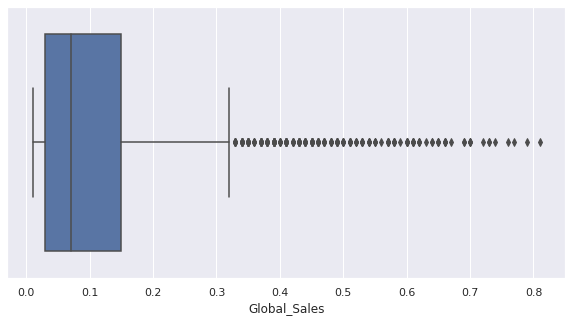

In [156]:
sns.boxplot(x=yrly['Global_Sales'], showfliers=True)

In [157]:
tot_yr = yrly.groupby('Year_of_Release').sum().sort_values('Global_Sales',ascending=False)

In [158]:
tot_yr

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
2011.0,60.10,28.12,9.60,9.98,107.89
2012.0,24.43,13.64,8.55,4.26,50.92
2014.0,19.17,15.25,6.83,4.63,45.89
2015.0,17.17,14.31,8.47,4.12,44.06
2013.0,13.18,10.27,6.70,2.96,33.20
2016.0,8.80,8.96,5.54,2.37,25.79
2020.0,0.27,0.00,0.00,0.02,0.29
2017.0,0.00,0.00,0.06,0.00,0.06


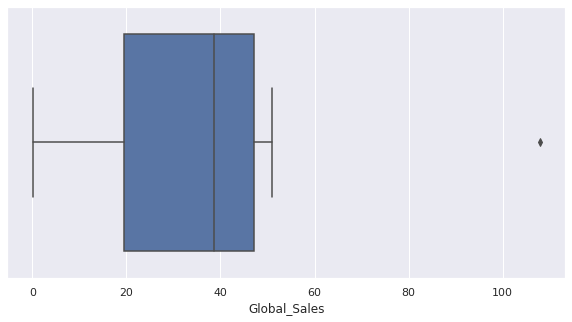

In [159]:
sns.boxplot(x=tot_yr['Global_Sales'])

In [160]:
tot_yr.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,17.890000,11.318750,5.718750,3.542500,38.512500
std,19.130907,9.062988,3.734103,3.165523,34.188605
min,0.000000,0.000000,0.000000,0.000000,0.060000
25%,6.667500,6.720000,4.170000,1.782500,19.415000
50%,15.175000,11.955000,6.765000,3.540000,38.630000
75%,20.485000,14.545000,8.490000,4.352500,47.147500
max,60.100000,28.120000,9.600000,9.980000,107.890000


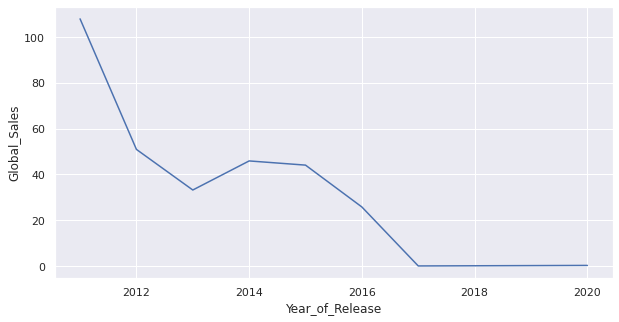

In [161]:
sns.lineplot(data=tot_yr ,x='Year_of_Release', y='Global_Sales')

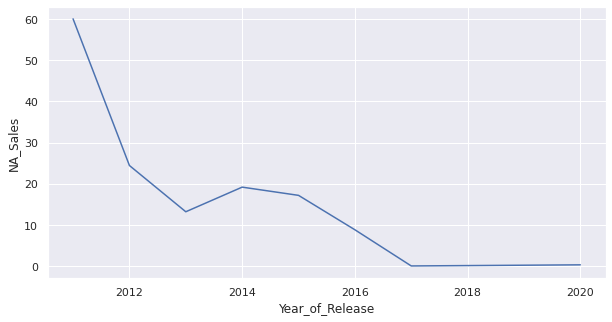

In [162]:
sns.lineplot(data=tot_yr ,x='Year_of_Release', y='NA_Sales')

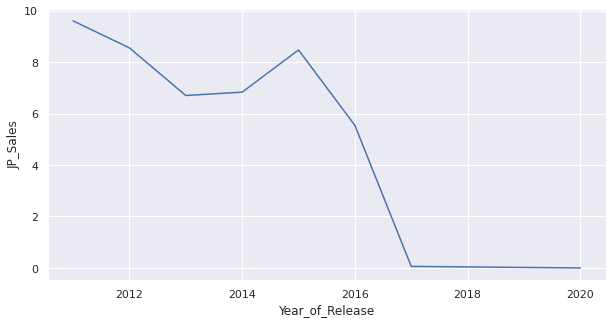

In [163]:
sns.lineplot(data=tot_yr ,x='Year_of_Release', y='JP_Sales')

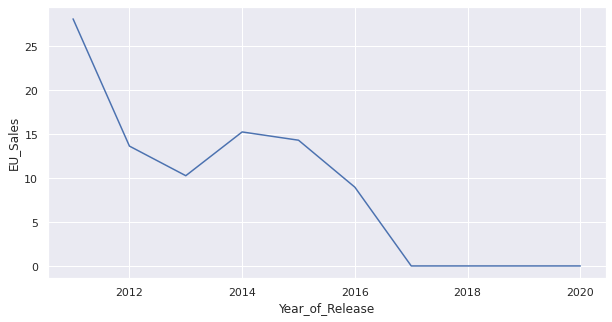

In [164]:
sns.lineplot(data=tot_yr ,x='Year_of_Release', y='EU_Sales')

### Genre Analysis

In [165]:
df_out_rem['Genre'].unique()

array(['Platform', 'Action', 'Puzzle', 'Adventure', 'Strategy', 'Shooter',
       'Misc', 'Fighting', 'Sports', 'Role-Playing', 'Simulation',
       'Racing', nan], dtype=object)

In [166]:
gen = df_out_rem[['Genre','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales' ]]
gen.dropna(inplace=True)
gen

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2323,Platform,0.60,0.22,0.05,0.02,0.89
2413,Action,0.59,0.20,0.00,0.07,0.86
2426,Puzzle,0.60,0.19,0.00,0.07,0.85
2471,Adventure,0.60,0.22,0.00,0.01,0.84
2482,Action,0.60,0.22,0.00,0.01,0.83
...,...,...,...,...,...,...
16714,Action,0.00,0.00,0.01,0.00,0.01
16715,Sports,0.00,0.01,0.00,0.00,0.01
16716,Adventure,0.00,0.00,0.01,0.00,0.01
16717,Platform,0.01,0.00,0.00,0.00,0.01


In [167]:
gen['Genre'].unique()

array(['Platform', 'Action', 'Puzzle', 'Adventure', 'Strategy', 'Shooter',
       'Misc', 'Fighting', 'Sports', 'Role-Playing', 'Simulation',
       'Racing'], dtype=object)

In [168]:
gen_tot = gen.groupby('Genre').sum().sort_values('Global_Sales')
gen_tot

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Strategy,23.25,12.29,5.68,3.11,44.62
Puzzle,34.39,11.04,2.51,3.32,51.68
Fighting,52.08,20.34,10.39,6.23,89.01
Role-Playing,46.70,18.69,22.76,6.85,95.00
Adventure,47.67,21.81,20.14,6.22,96.01
Simulation,67.32,17.68,5.45,7.18,97.83
Platform,68.94,27.12,2.94,6.69,106.01
Shooter,86.34,35.83,4.01,10.04,136.61
Racing,91.76,40.42,2.50,10.82,145.87


In [169]:
gen_tot.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,92.059167,34.735000,10.210000,10.644167,148.056667
std,69.556505,25.983303,7.890255,8.042501,106.594027
min,23.250000,11.040000,2.500000,3.110000,44.620000
25%,47.427500,18.437500,3.742500,6.227500,93.502500
50%,68.130000,24.465000,7.625000,7.015000,101.920000
75%,102.600000,41.697500,15.205000,11.977500,162.007500
max,246.170000,99.840000,23.010000,29.810000,399.980000


In [170]:
gen_tot.index

Index(['Strategy', 'Puzzle', 'Fighting', 'Role-Playing', 'Adventure',
       'Simulation', 'Platform', 'Shooter', 'Racing', 'Misc', 'Sports',
       'Action'],
      dtype='object', name='Genre')

In [171]:
for g in gen_tot.index.tolist():
  print(g.ljust(15) + " : " + str(gen[gen['Genre']==g].shape[0]))

Strategy        : 445
Puzzle          : 445
Fighting        : 517
Role-Playing    : 795
Adventure       : 1106
Simulation      : 632
Platform        : 555
Shooter         : 753
Racing          : 870
Misc            : 1317
Sports          : 1551
Action          : 2289


### Critic Score

In [172]:
df_out_rem = df_out_rem[df_out_rem['Year_of_Release']>2010]

In [173]:
cri = df_out_rem[['Platform','Genre', 'Critic_Score','Critic_Count','User_Score','User_Count']]
cri.dropna(inplace=True)
cri

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Platform,Genre,Critic_Score,Critic_Count,User_Score,User_Count
2525,X360,Misc,86.0,43.0,8.0,45.0
2592,X360,Action,74.0,69.0,7.0,173.0
2655,X360,Sports,70.0,36.0,6.5,15.0
2847,X360,Shooter,74.0,16.0,6.4,161.0
2895,X360,Sports,82.0,65.0,6.4,186.0
...,...,...,...,...,...,...
16634,XOne,Racing,63.0,8.0,8.2,22.0
16656,WiiU,Action,81.0,46.0,8.5,151.0
16664,XOne,Action,74.0,13.0,6.7,7.0
16700,PC,Shooter,61.0,12.0,5.8,43.0


In [174]:
cri.describe()

,Critic_Score,Critic_Count,User_Score,User_Count
count,811.000000,811.000000,811.000000,811.000000
mean,67.139334,21.975339,6.743280,53.069051
std,11.448826,15.173462,1.148628,44.448002
min,32.000000,3.000000,3.800000,4.000000
25%,60.000000,10.000000,6.000000,18.000000
50%,69.000000,18.000000,6.900000,38.000000
75%,75.000000,31.000000,7.700000,76.500000
max,93.000000,71.000000,9.300000,186.000000


In [175]:
app_score = cri[cri['User_Count']>25 ]
app_score = app_score[app_score['Critic_Count']>20]
app_score

,Platform,Genre,Critic_Score,Critic_Count,User_Score,User_Count
2525,X360,Misc,86.0,43.0,8.0,45.0
2592,X360,Action,74.0,69.0,7.0,173.0
2895,X360,Sports,82.0,65.0,6.4,186.0
2918,X360,Sports,86.0,56.0,7.0,72.0
3014,X360,Action,81.0,39.0,7.2,139.0
...,...,...,...,...,...,...
16424,WiiU,Puzzle,70.0,26.0,7.4,72.0
16457,PC,Strategy,71.0,37.0,7.1,93.0
16503,PS4,Adventure,70.0,27.0,6.8,64.0
16534,PS4,Action,51.0,28.0,5.5,39.0


In [176]:
app_score.describe()

,Critic_Score,Critic_Count,User_Score,User_Count
count,290.000000,290.000000,290.000000,290.000000
mean,68.906897,37.368966,6.846207,80.486207
std,10.485859,12.259806,1.091808,42.550131
min,39.000000,21.000000,3.800000,26.000000
25%,61.000000,28.000000,6.200000,45.000000
50%,71.000000,34.000000,7.100000,72.500000
75%,77.000000,46.000000,7.700000,108.250000
max,90.000000,71.000000,9.000000,186.000000


In [177]:
plt_score = app_score[['Platform', 'Critic_Score','User_Score']]
plt_score

,Platform,Critic_Score,User_Score
2525,X360,86.0,8.0
2592,X360,74.0,7.0
2895,X360,82.0,6.4
2918,X360,86.0,7.0
3014,X360,81.0,7.2
...,...,...,...
16424,WiiU,70.0,7.4
16457,PC,71.0,7.1
16503,PS4,70.0,6.8
16534,PS4,51.0,5.5


In [178]:
plt_mean = plt_score.groupby('Platform').mean().sort_values('Critic_Score')
plt_mean

,Critic_Score,User_Score
Platform,,
PS3,66.728814,6.716949
PSP,67.000000,8.200000
PSV,68.000000,7.008333
WiiU,68.222222,7.055556
Wii,68.500000,7.800000
3DS,68.541667,7.237500
PC,68.562500,6.456250
X360,69.243243,6.651351
PS4,69.809524,7.084127


In [179]:
plt_mean.describe()

,Critic_Score,User_Score
count,11.000000,11.000000
mean,69.499120,7.170434
std,2.867512,0.636474
min,66.728814,6.456250
25%,68.111111,6.684150
50%,68.541667,7.055556
75%,69.526384,7.518750
max,76.000000,8.200000


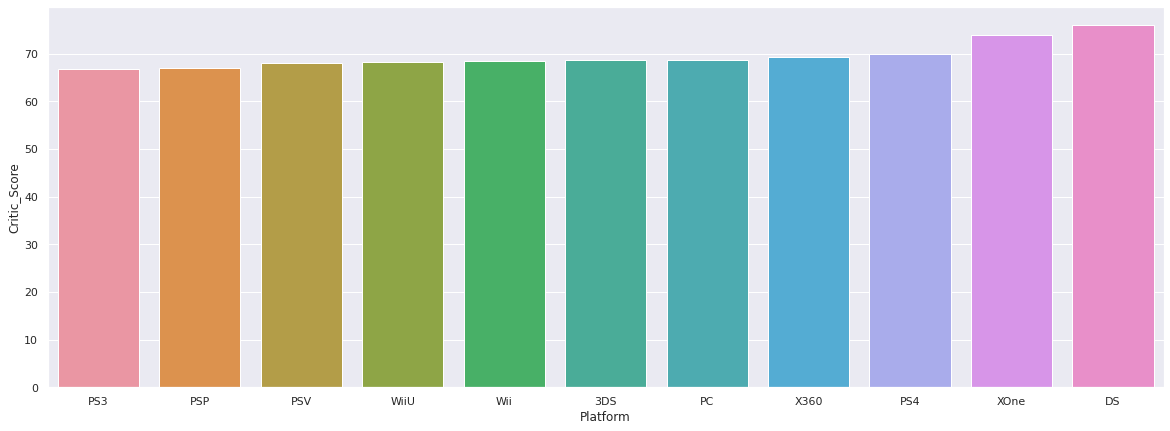

In [180]:
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data=plt_mean, x=plt_mean.index, y='Critic_Score')

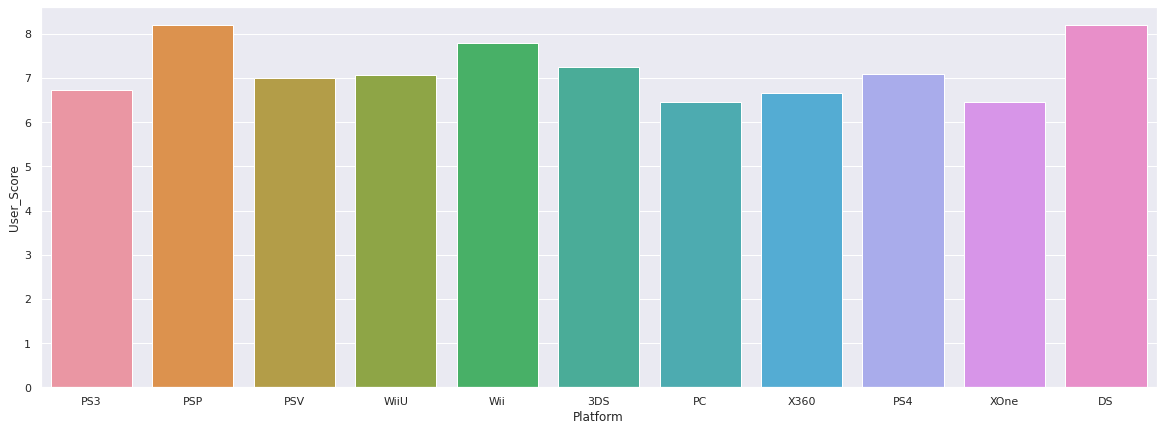

In [181]:
sns.barplot(data=plt_mean, x=plt_mean.index, y='User_Score')

In [182]:
gen_score = app_score[['Genre', 'Critic_Score','User_Score']]
gen_score

,Genre,Critic_Score,User_Score
2525,Misc,86.0,8.0
2592,Action,74.0,7.0
2895,Sports,82.0,6.4
2918,Sports,86.0,7.0
3014,Action,81.0,7.2
...,...,...,...
16424,Puzzle,70.0,7.4
16457,Strategy,71.0,7.1
16503,Adventure,70.0,6.8
16534,Action,51.0,5.5


In [183]:
gen_mean = gen_score.groupby('Genre').mean().sort_values('Critic_Score')
gen_mean

,Critic_Score,User_Score
Genre,,
Shooter,64.911765,6.608824
Action,66.145833,6.829167
Role-Playing,66.775000,7.150000
Platform,69.625000,6.875000
Strategy,70.777778,6.622222
Fighting,71.774194,6.864516
Adventure,71.928571,7.678571
Racing,72.266667,6.706667
Simulation,73.250000,6.825000


In [184]:
gen_mean.describe()

,Critic_Score,User_Score
count,12.000000,12.000000
mean,71.193932,6.905813
std,3.724565,0.426424
min,64.911765,6.063636
25%,68.912500,6.685556
50%,71.851382,6.846841
75%,73.750000,7.147115
max,76.076923,7.678571


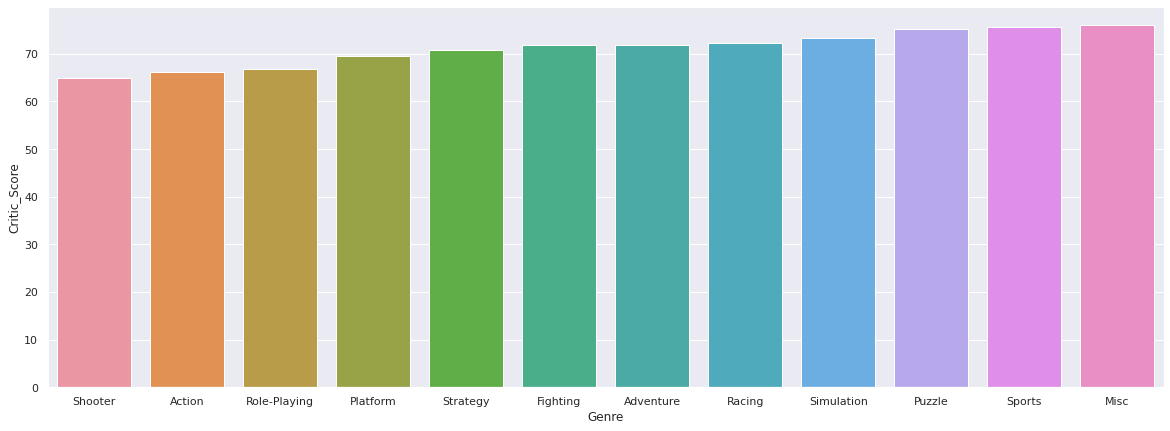

In [185]:
sns.barplot(data=gen_mean, x=gen_mean.index, y='Critic_Score')

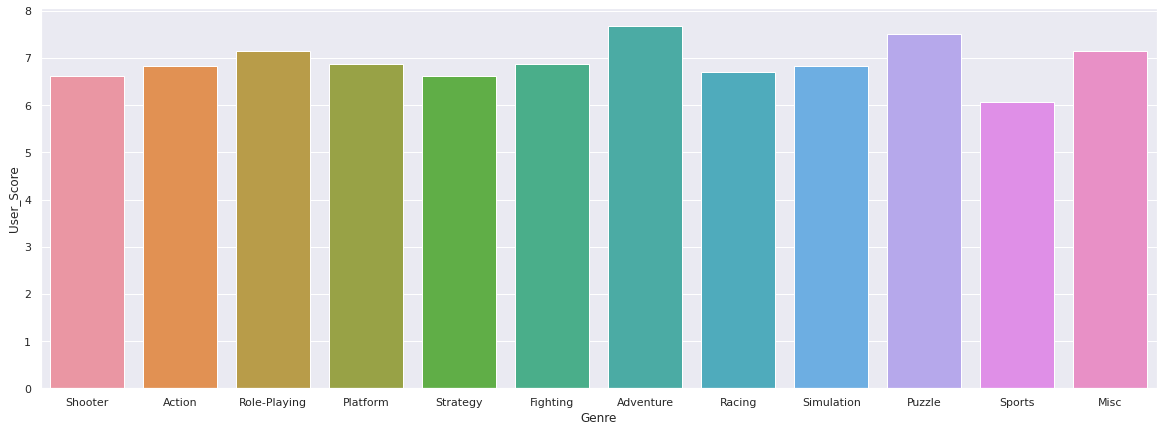

In [186]:
sns.barplot(data=gen_mean, x=gen_mean.index, y='User_Score')

### Rating

In [187]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [188]:
df_out_rem['Rating'].unique()

array(['T', 'M', 'E', nan, 'E10+', 'EC', 'RP'], dtype=object)

In [189]:
rat = df_out_rem[['Global_Sales','Rating']].sort_values('Global_Sales',ascending=False).dropna()
rat

,Global_Sales,Rating
2525,0.81,T
2592,0.79,M
2655,0.77,E
2847,0.72,M
2918,0.70,E10+
...,...,...
16276,0.01,E10+
16304,0.01,T
16308,0.01,E10+
16315,0.01,E


In [190]:
rat['Rating'].unique()

array(['T', 'M', 'E', 'E10+', 'EC', 'RP'], dtype=object)

In [191]:
rat.describe()

,Global_Sales
count,1266.000000
mean,0.166682
std,0.152508
min,0.010000
25%,0.050000
50%,0.120000
75%,0.240000
max,0.810000


In [192]:
rat.groupby('Rating').sum().sort_values('Global_Sales',ascending=False)

,Global_Sales
Rating,
E10+,60.36
T,59.01
E,57.07
M,34.10
EC,0.45
RP,0.03


In [193]:
rat.groupby('Rating').mean().sort_values('Global_Sales',ascending=False)

,Global_Sales
Rating,
EC,0.450000
E10+,0.202550
M,0.168812
T,0.154073
E,0.149790
RP,0.030000


### Inference:

For the above experiment, the objective was to perform descriptive analysis and find out what information does the data provide. For this the dataset taken is about video game sales released across different platforms between 1980-2020. The dataset contains the sales in North America, Europe, Japan and others combined. It also shows the scores given by critics and users and the number of critics and years. The genre of the game is also given. The following points were concluded form the above analysis:

* the correlation matrix showed that the sales for each of the 3 regions have high correlation and global sales also has high correlation with other sales columns since it is the sum of those columns.
* the global sales and critic , user scores had a lot of outliers, so these outliers were removed from the data.
* the platform 'PS2' had the highest global sales.
* the data was were trimmed by adding the condition to get data only for the last decade, to see the latest platforms that performed well globally.
* the sales of video games decreased from 2011 - 2020
* The region 'JP' which had the lowest sales compared to the other regions, had the slowest decline compared to others.
* the genre 'Action' saw the highest sales while 'Strategy' saw the lowest sales among the different genres of games in the dataset.
* for comparison of platforms by scores, first I removed games which had lowest the number of critic and user counts.
* the games on platform DS received higher scores compared to PS3 by critics and same pattern was observed in the user scores.
* Critics voted Shooter games the lowest while the users voted Sports as lowest and Adventure as highest.
* Since the outliers that were removed had higher sales for the particular games, most of the games that were removed had the rating A(adult only), it can be concluded that most of the games which had higher sales were mostly Adult rated.